# Multivariate Data Analysis

In [1]:
# libraries
import os
import sys
import inspect
sys.path.append("../src")

import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from shared import directories
from shared import filenames
from shared import variables
sys.path.append(directories.ANALYSIS_PATH)

import visual
import multivariate
import bivariate

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Obtain training data

In [3]:
df = pd.read_csv(os.path.join(directories.INTERIM_DATA_DIR,
                              filenames.TRAIN_FILENAME),
                 encoding="Latin-1", low_memory=False)

## Independence

### Correlation Matrix

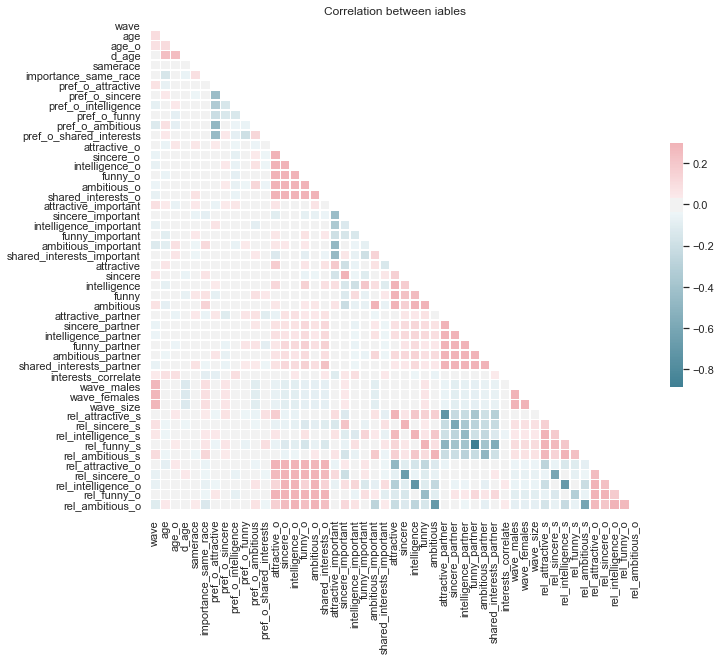

In [4]:
visual.corr_plot(df.select_dtypes(include=[np.number]))

### Association Matrix

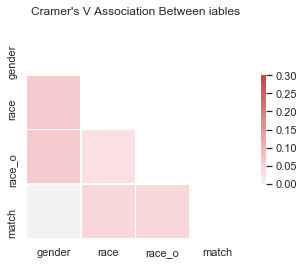

In [5]:
visual.assoc_plot(df.select_dtypes(include='object'))

## Preference Analysis
What are the preferences by gender and race

### Preferences by Gender

## Principal Component Analysis

In [6]:
df = df.dropna()
columns = df.columns
match = df['match']

# Label categorical variables
le = LabelEncoder()
df = df.apply(le.fit_transform)

# Scale all variables
ss = StandardScaler()
df = ss.fit_transform(df)
df = pd.DataFrame(df, columns=columns)

# Split into X and y values
X = df.drop(columns='match')
y = match

# Run Principal Components Analysis
pca = multivariate.PrincipalComponents(len(columns)-1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=52, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Scree Plot

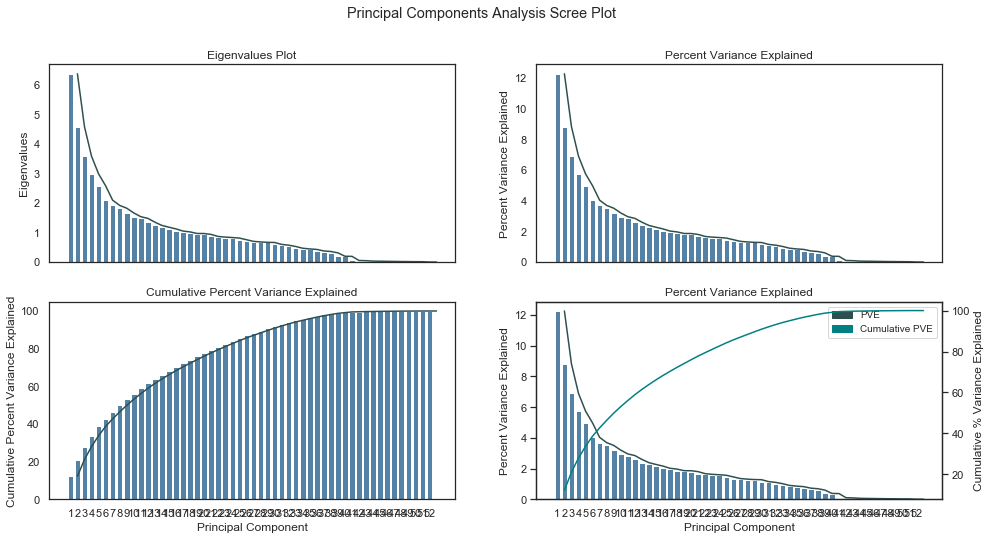

In [7]:
pca.screeplot()

### Biplot

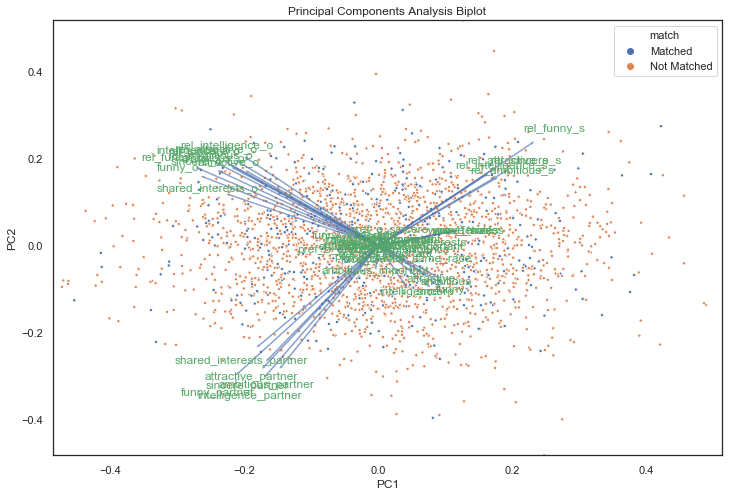

In [8]:
pca.biplot(group_var=y)

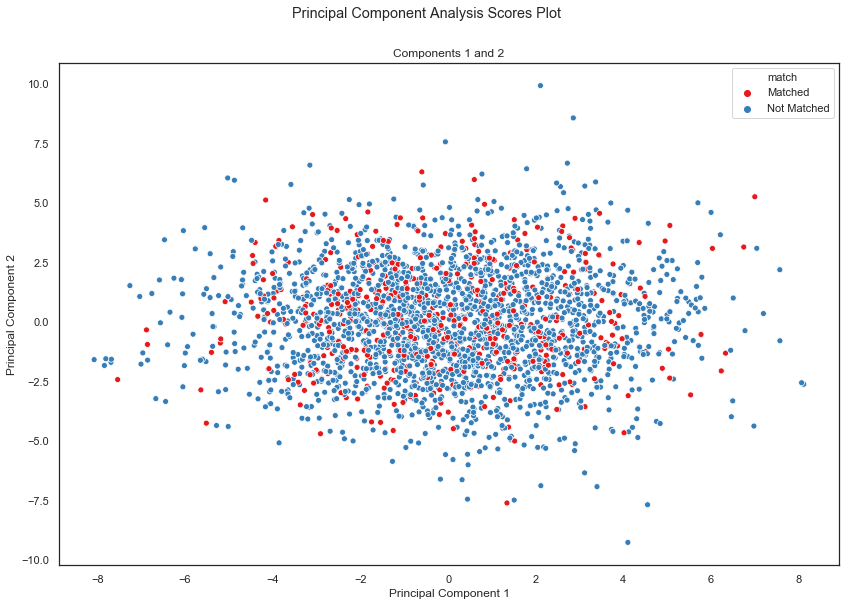

In [9]:
pca.score_plot(group_var=y)

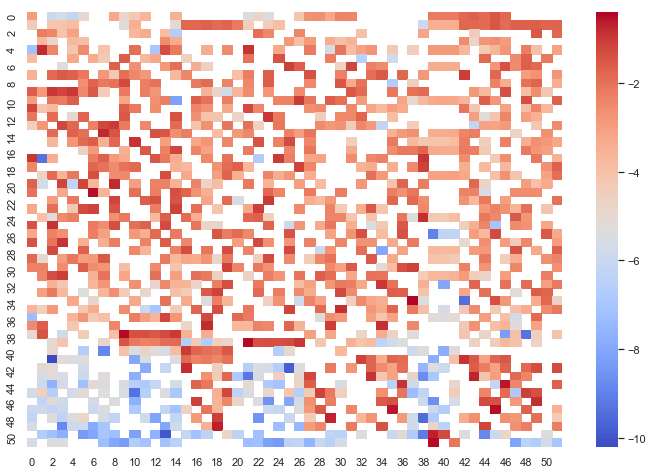

In [10]:
pca.heatmap()